# Plot the trace vs angle of matrix

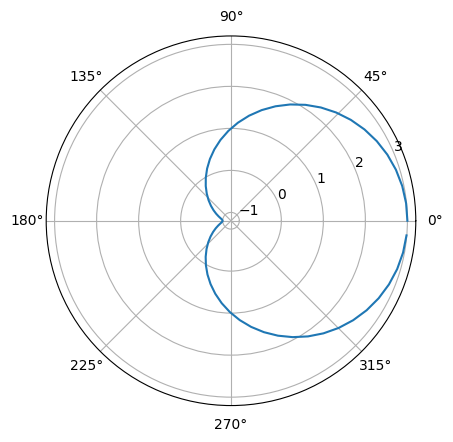

In [14]:
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
import numpy as np

angles = []
traces = []
for angle in np.arange(0, 2*np.pi, 0.1):
    axis = np.array([1,0,0])
    rotation = R.from_rotvec(angle * axis).as_matrix()
    traces.append(np.trace(rotation))
    angles.append(angle)
    
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})
ax.set_rticks([-1, 0, 1, 2, 3])
ax.plot(angles, traces)

In [15]:
axis = np.array([1,0,0])
for angle in [60, 120, 179.37]:
    angle_r = np.deg2rad(angle)
    rotation = R.from_rotvec(angle_r * axis).as_matrix()
    print(f"Angle: {angle}, Trace {np.trace(rotation)}")

Angle: 60, Trace 2.0000000000000004
Angle: 120, Trace 4.440892098500626e-16
Angle: 179.37, Trace -0.9998790985642025


# Test different ways of computing angles

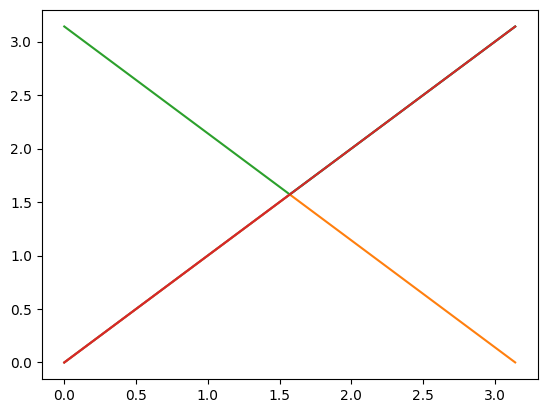

In [134]:
def make_u_matrix(rotation):
    return [rotation[2][1] - rotation[1][2],
            rotation[0][2] - rotation[2][0],
            rotation[1][0] - rotation[0][1]]

def angle_from_log_small(rotation):
    # Used for smaller angle than 60 deg
    v = make_u_matrix(rotation)
    return np.arcsin(0.5*np.linalg.norm(v))

def angle_from_log_large(rotation):
    # Used from angles higher than 120 deg
    v = make_u_matrix(rotation)
    return np.pi - np.arcsin(0.5 * np.linalg.norm(v))

def angle_from_log_generic(rotation):
    return np.arccos(0.5 * (np.trace(rotation) - 1))

angles = []
traces = []
recovered_angles_from_small = []
recovered_angles_from_large = []
recovered_angles_from_generic = []
for angle in np.arange(0, np.pi, 0.001):
    axis = np.array([1,0,0])
    axis_angle = angle * axis
    rotation = R.from_rotvec(axis_angle).as_matrix()
    traces.append(np.trace(rotation))
    angles.append(angle)
    # Recover angles
    recovered_angles_from_large.append(angle_from_log_large(rotation))
    recovered_angles_from_small.append(angle_from_log_small(rotation))
    recovered_angles_from_generic.append(angle_from_log_generic(rotation))
    
fig, ax = plt.subplots()#(subplot_kw={'projection':'polar'})
#ax.set_rticks([-1, 0, 1, 2, 3])
#ax.plot(angles, [np.abs(x - y) for x, y in zip(angles, recovered_angles_from_generic)])
#ax.plot(angles, recovered_angles_from_large)
ax.plot(angles, angles)
ax.plot(angles, recovered_angles_from_small)
ax.plot(angles, recovered_angles_from_large)
ax.plot(angles, recovered_angles_from_generic)

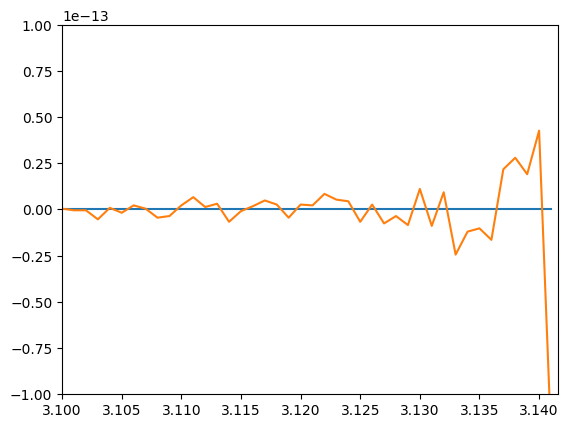

In [157]:
fig, ax = plt.subplots()
ax.plot(angles, [y-x for x, y in zip(angles,recovered_angles_from_large)])
ax.plot(angles, [y-x for x, y in zip(angles,recovered_angles_from_generic)])
plt.xlim([3.10, np.pi])
plt.ylim([-1e-13, 1e-13])
plt.show()

In [161]:
axis = np.array([1,0,1])
axis = axis / np.linalg.norm(axis)
for angle in [60, 120, 179.37, 179.999]:
    angle_r = np.deg2rad(angle)
    rotation = R.from_rotvec(angle_r * axis).as_matrix()
    print(f"Angle: {angle}, Trace {np.trace(rotation)}")
    print("U matrix")
    print(make_u_matrix(rotation))
    print("matrix")
    print(rotation)

Angle: 60, Trace 2.0000000000000004
U matrix
[1.224744871391589, 0.0, 1.224744871391589]
matrix
[[ 0.75       -0.61237244  0.25      ]
 [ 0.61237244  0.5        -0.61237244]
 [ 0.25        0.61237244  0.75      ]]
Angle: 120, Trace 4.440892098500626e-16
U matrix
[1.2247448713915892, 0.0, 1.2247448713915892]
matrix
[[ 0.25       -0.61237244  0.75      ]
 [ 0.61237244 -0.5        -0.61237244]
 [ 0.75        0.61237244  0.25      ]]
Angle: 179.37, Trace -0.9998790985642024
U matrix
[0.015549776944250984, 0.0, 0.015549776944250984]
matrix
[[ 3.02253589e-05 -7.77488847e-03  9.99969775e-01]
 [ 7.77488847e-03 -9.99939549e-01 -7.77488847e-03]
 [ 9.99969775e-01  7.77488847e-03  3.02253589e-05]]
Angle: 179.999, Trace -0.9999999996953827
U matrix
[2.468268298956648e-05, 0.0, 2.468268298956648e-05]
matrix
[[ 7.61543550e-11 -1.23413415e-05  1.00000000e+00]
 [ 1.23413415e-05 -1.00000000e+00 -1.23413415e-05]
 [ 1.00000000e+00  1.23413415e-05  7.61543550e-11]]
